In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Multiple Linear Regression using Hands on

## Loading Data

In [3]:
data = pd.read_csv("multiple_linear_regression.csv")

In [4]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## data Preprocessing

In [6]:
data = data.dropna()
data.shape

(200, 4)

## Splitting data

In [7]:
output_col = "Target"

In [8]:
# input data
x = data.iloc[:, data.columns != output_col]

In [9]:
x.head()

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [10]:
# output data
y = data.loc[:, output_col]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Target, dtype: float64

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x , y , train_size= 0.70, random_state=43)

In [12]:
data.shape

(200, 4)

In [13]:
x_train.shape, x_test.shape

((140, 3), (60, 3))

In [14]:
y_train.shape, y_test.shape

((140,), (60,))

## training

In [15]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [17]:
lr.intercept_

3.0777744955280504

## Predictions

In [18]:
pred_values = lr.predict(x_test)

## cost

In [19]:
cost = mean_squared_error(y_test, pred_values)
cost

2.241286253093347

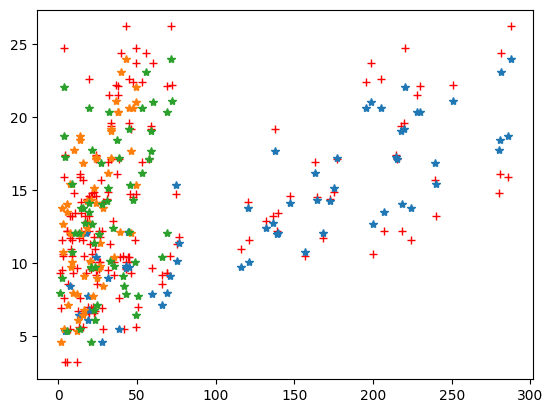

In [20]:
plt.plot(x_test, y_test, "+", c='red')
plt.plot(x_test, pred_values, "*")
plt.show()

# Assumptions of Linear Regression

## Homoscedasticity
residuals = (y' - y)

In [21]:
pred_values

array([ 8.41710143, 15.36146115, 12.08619274,  9.75953058, 11.37799221,
       18.73526253, 23.94158412,  7.11931733, 22.06606191, 16.83172907,
        7.93115903, 23.07243791, 19.15729792,  5.47677475, 15.42102256,
        9.82205717, 12.08023645,  9.76094922, 21.07717663,  9.13945016,
       20.36205828, 12.03862691, 13.78082146, 10.73225482, 16.20061541,
        7.77042699, 20.6251206 , 20.31966315,  8.97266008, 14.13746173,
       17.28381353, 15.13827164, 17.18376843, 19.03374633, 17.13952183,
       12.14670527, 12.7815946 ,  6.08135492, 10.06634988, 13.48921606,
       12.01549843,  9.70107337,  5.35398678, 10.14966171, 14.224196  ,
       14.04780871, 14.33053495, 10.39465714, 21.04417964, 13.74703482,
        6.4651166 ,  7.90550808, 17.69866554, 17.74668208, 12.39498913,
       12.69345805, 20.58946722, 18.4269009 ,  4.59145621,  6.82129794])

In [22]:
residuals = y_test - pred_values
residuals

56    -2.917101
37    -0.661461
67     1.313807
79     1.240469
80     0.422008
188   -2.835263
183    2.258416
10     1.480683
128    2.633938
62    -1.131729
65     1.368841
17     1.327562
133    0.442702
195    2.123225
146   -2.221023
38     0.277943
173   -0.380236
149    0.339051
93     1.122823
29     1.360550
0      1.737942
2     -2.738627
122   -2.180821
180   -0.232255
95     0.699385
121   -0.770427
185    1.974879
39     1.180337
66     0.527340
19     0.462538
11     0.116186
45    -0.238272
41    -0.083768
92     0.366254
168   -0.039522
1     -1.746705
57     0.418405
189    0.618645
151    1.533650
167   -1.289216
116    0.184502
138   -0.101073
155   -2.153987
82     1.150338
160    0.175804
181   -1.847809
171    0.169465
12    -1.194657
55     2.655820
77     0.452965
22    -0.865117
129    1.794492
105    1.501334
102   -2.946682
159    0.505011
9     -2.093458
15     1.810533
150   -2.326901
76     2.308544
119   -0.221298
Name: Target, dtype: float64

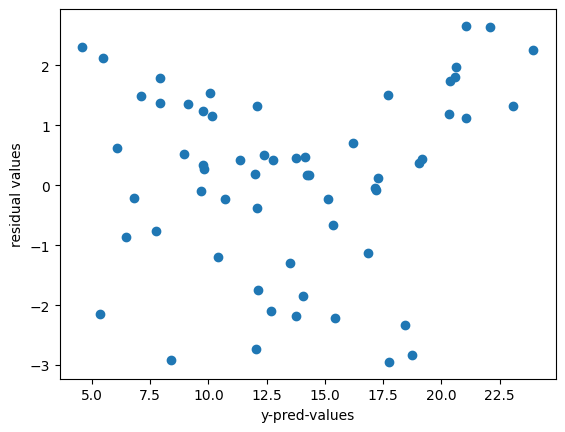

In [23]:
plt.scatter(pred_values, residuals)
plt.xlabel('y-pred-values')
plt.ylabel('residual values')
plt.show()

it fine to use the liner regression for this data as per homoscedasticity

## Normality of the Residuals

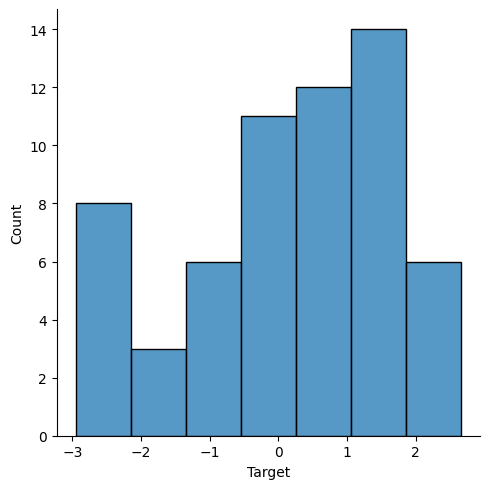

In [24]:
sns.displot(residuals)
plt.show()

# Ordinary Least Square (OLS) Method

In [25]:
import statsmodels.api as sm

In [26]:
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [27]:
x_with_constant = sm.add_constant(x_train)
x_with_constant

,const,Feature 1,Feature 2,Feature 3
71,1.0,109.8,14.3,31.7
90,1.0,134.3,4.9,9.3
100,1.0,222.4,4.3,49.8
44,1.0,25.1,25.7,43.3
94,1.0,107.4,14.0,10.9
...,...,...,...,...
58,1.0,210.8,49.6,37.7
21,1.0,237.4,5.1,23.5
49,1.0,66.9,11.7,36.8
64,1.0,131.1,42.8,28.9


In [28]:
model = sm.OLS(y_train, x_with_constant)

In [29]:
result = model.fit()

In [30]:
result.params

const        3.077774
Feature 1    0.045978
Feature 2    0.180929
Feature 3   -0.001942
dtype: float64

In [31]:
lr.coef_

array([ 0.0459782 ,  0.18092867, -0.00194226])

In [32]:
lr.intercept_

3.0777744955280504

In [33]:
# this is the powerfull tool
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     346.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.67e-63
Time:                        22:21:17   Log-Likelihood:                -276.47
No. Observations:                 140   AIC:                             560.9
Df Residuals:                     136   BIC:                             572.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0778      0.398      7.735      0.0

* if we see the feature 3 above, we can see P>|t| is 0.780 which indicates that our null hypothesis is accepted and that indicates that feature 3 is a model where it's not good to predict the values as it is not a strong parameter
* the best thing to do in this case is to remove the Feature 3 column and do OLS for this

## OLS without Feature 3

In [34]:
x_with_constant = sm.add_constant(x_train[['Feature 1','Feature 2']])
x_with_constant

,const,Feature 1,Feature 2
71,1.0,109.8,14.3
90,1.0,134.3,4.9
100,1.0,222.4,4.3
44,1.0,25.1,25.7
94,1.0,107.4,14.0
...,...,...,...
58,1.0,210.8,49.6
21,1.0,237.4,5.1
49,1.0,66.9,11.7
64,1.0,131.1,42.8


In [35]:
model1 = sm.OLS(y_train, x_with_constant)
result1 = model1.fit()
result1.params

const        3.042658
Feature 1    0.045956
Feature 2    0.180111
dtype: float64

In [36]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     523.8
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           6.70e-65
Time:                        22:21:17   Log-Likelihood:                -276.51
No. Observations:                 140   AIC:                             559.0
Df Residuals:                     137   BIC:                             567.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0427      0.376      8.085      0.0